### Project Steps Overview
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

## Table of Contents
<ul>
<li><a href="#data_access">Access Data</a></li>
<li><a href="#investigate">Investigate Datasets</a></li>
<li><a href="#archive">Twitter Archive Data Wrangling</a></li>
<li><a href="#archive_clean">Twitter Archive Data Cleaning</a></li>
<li><a href="#archive_analysis">Twitter Archive Data Analysis</a></li>
<li><a href="#image">Image Prediction data Wrangling</a></li>
<li><a href="#api_data">Tweet API Data Cleaning</a></li>
<li><a href="#data_analysis">Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

### Import packages

In [1]:
#import packages that will  be used in the analysis
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import json
#I will use beautifulsoup library to load my data to my file
from bs4 import BeautifulSoup

<a id='data_access'></a>
## Access  data
### 1. Import image prediction dataset

In [2]:
#Get data from the URL
image_prediction_data = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
#Save the file to my local(use binary mode since it is a binary file)
with open('Data//image_prediction.tsv', mode='wb') as file:
    file.write(image_prediction_data.content)
    
#Load the data using beautifulSoup package
with open('Data//image_prediction.tsv') as file:
    prediction_file = BeautifulSoup(file)    
#Let us see the file
prediction_file

<html><body><p>tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog
666020888022790149	https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg	1	Welsh_springer_spaniel	0.465074	True	collie	0.156665	True	Shetland_sheepdog	0.0614285	True
666029285002620928	https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg	1	redbone	0.506826	True	miniature_pinscher	0.07419169999999999	True	Rhodesian_ridgeback	0.07201	True
666033412701032449	https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg	1	German_shepherd	0.596461	True	malinois	0.13858399999999998	True	bloodhound	0.11619700000000001	True
666044226329800704	https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg	1	Rhodesian_ridgeback	0.408143	True	redbone	0.360687	True	miniature_pinscher	0.222752	True
666049248165822465	https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg	1	miniature_pinscher	0.560311	True	Rottweiler	0.243682	True	Doberman	0.154629	True
666050758794694657	https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg	1	Bernese_mountain_dog	0.651137	Tr

In [3]:
# Read the data in pandas to covert it to a table
image_data=pd.read_csv("Data//image_prediction.tsv", sep="\t")
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
#Save the csv to my working directory
image_data.to_csv("Data//image_prediction.csv", index=False)

#### Image predictions file columns
- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → **golden retriever**
- jpg_url is the url to view dog image
- img_num is the number of images in that URL
- p1_conf is how confident the algorithm is in its #1 prediction → **95%**
- p1_dog is whether or not the #1 prediction is a breed of dog → **TRUE**
- p2 is the algorithm's second most likely prediction → **Labrador retriever**
- p2_conf is how confident the algorithm is in its #2 prediction → **1%**
- p2_dog is whether or not the #2 prediction is a breed of dog → **TRUE**

### 2.Twitter archive enhancement table


In [5]:
# Read twiter enhancement table that has already been downloaded
twitter_enhanced = pd.read_csv("Data//twitter-archive-enhanced.csv")
twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
twitter_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Twitter Archive file column
- tweet_id - this is the Id for each tweet,
- in_reply_to_status_id - 
- in_reply_to_user_id - 
- timestamp -
- source -
- text -
- retweeted_status_id -
- retweeted_status_user_id -
- retweeted_status_timestamp - 
- expanded_urls - 
- rating_numerator - 
- rating_denominator - 
- name  - 
- doggo - 
- floofer - 
- pupper -
- puppo -

### 3. Twitter API data

In [7]:
#Read the tweet_json file I downloaded
tweet_txt_data=pd.read_table("Data//tweet_json.txt")
# Import the json format of tweet data
tweet_api_data=pd.read_json("Data//tweet_json.json",lines=True)
tweet_api_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
#Save the tweet_api_data
tweet_api_data.to_csv("Data//tweet_api_data.csv")

- created_at
- id
- id_str            
- full_tex
- truncated
- display_text_range
- entities
- extended_entities
- source
- in_reply_to_status_id - The id when a user replies to a tweet
- in_reply_to_status_id_str - 
- in_reply_to_user_id
- in_reply_to_user_id_str
- in_reply_to_screen_name
- user
- geo
- coordinates
- place
- contributors
- is_quote_status
- retweet_count
- favorite_count
- favorited
- retweeted
- possibly_sensitive
- possibly_sensitive_appealable
- lang
- retweeted_status - Status to show whether the tweet wa retweeted 
- quoted_status_id 
- quoted_status_id_str
- quoted_status

<a id='investigate'></a>
### Investigate the datasets

In [9]:
#Check the shape of the image predictions dataset
print('The shape of image predictions data is:',image_data.shape)
print('The shape of twitter archive data is:',twitter_enhanced.shape)
print('The shape of API twet data is:',tweet_api_data.shape)


The shape of image predictions data is: (2075, 12)
The shape of twitter archive data is: (2356, 17)
The shape of API twet data is: (2354, 31)


In [10]:
#chek the columns information on image predictions dataset
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#chek the columns information on twitter archive dataset
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
#chek the columns information on twitter API dataset
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

From the above information we find out that **Image prediction dataset** does not have any null values whereas we have null values on user and twitter ids columns on **Enhancement archive dataset**
We also have couple of columns on API twitter data with null values

In [13]:
#Check how many null values we have in each column on image predictions dataset
image_data.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [14]:
#Check how many null values we have in each column on enhanced archive dataset
twitter_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
#Check how many null values we have in each column on twitter API dataset
tweet_api_data.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

<a id='archive'></a>
## Twitter Archive Data Wrangling

In [16]:
#We start by looking at date formats on all datasets which need to be formatted to the correct format
twitter_enhanced.timestamp[:5]

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [17]:
#Convert the date column
twitter_enhanced["timestamp"]=pd.to_datetime(twitter_enhanced["timestamp"])

twitter_enhanced["timestamp"] = twitter_enhanced["timestamp"].dt.date
#After converting now check the column
twitter_enhanced.timestamp[:5]

0    2017-08-01
1    2017-08-01
2    2017-07-31
3    2017-07-30
4    2017-07-29
Name: timestamp, dtype: object

In [18]:
#Let us confirm the column data type
twitter_enhanced.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


We have seen that the date has changed from timestamp to object
We need to change the data type back to date format

In [19]:
#Convert the data type back to datetime
twitter_enhanced["timestamp"]=pd.to_datetime(twitter_enhanced["timestamp"])
#Confirm the date type again
twitter_enhanced.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2356 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


In [20]:
duplicates=twitter_enhanced.duplicated().sum()
print("The dataset has {} duplicate rows".format(duplicates))

The dataset has 0 duplicate rows


**The dataset has no duplicates**

<a id='archive_clean'></a>
### Twitter Archive Data Cleaning

In [21]:
#Make the copy of the data
twitter_enhanced_v1=twitter_enhanced.copy()
twitter_enhanced_v1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [22]:
#check how many non null values in retweeted_status_id column
null_values=twitter_enhanced_v1["retweeted_status_id"].isnull().sum()
not_null=twitter_enhanced_v1["retweeted_status_id"].count()
print("We have {} null values on retweeted_status_id column".format(null_values))
print("We have {} non-null values on retweeted_status_id column".format(not_null))

We have 2175 null values on retweeted_status_id column
We have 181 non-null values on retweeted_status_id column


Retweet status id is a column that contains the ID when the tweet was retweeted 
We can remove this data from the data because it is data was retweeted and we might have the original tweet

In [23]:
#Filter data that has null values under retweeted_status_id
twitter_enhanced_v2=twitter_enhanced_v1[twitter_enhanced_v1.retweeted_status_id.isnull()]
#Check to see if we have rows with id on retweet status id column
not_null=twitter_enhanced_v2["retweeted_status_id"].count()
print("We have {} non-null values on retweeted_status_id column".format(not_null))

We have 0 non-null values on retweeted_status_id column


In [24]:
twitter_enhanced_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

In our analysis we do not need retweet and inreply columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

In [25]:
#Columns to delete
delete_columns = ['in_reply_to_user_id', 'in_reply_to_status_id',  
           'retweeted_status_id', 'retweeted_status_user_id', 
           'retweeted_status_timestamp']
#Drop the columns
twitter_enhanced_v2 = twitter_enhanced_v2.drop(delete_columns, axis=1)
twitter_enhanced_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


In [26]:
#We need to uneest the data so that we can include dog types column as arrays in one column
twitter_enhanced_v3= twitter_enhanced_v2.melt(id_vars=["tweet_id", "timestamp","source","text","expanded_urls",
                                                       "rating_numerator","rating_denominator","name"], 
        var_name="Dog_type", 
        value_name="type_available")
twitter_enhanced_v3.sample(5)

#Save the data to my local
twitter_enhanced_v3.to_csv("Data//twitter_archive_master.csv")

In [27]:
twitter_enhanced_v3.type_available.value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: type_available, dtype: int64

From above we can note that most of dog type is indicated as None

In [28]:
# We will like to check the ratings range we have on numerator ratings 
twitter_enhanced_v3.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,  182,
         15,  960,    0,    7,   84,   24,   75,   27,    3,    8,    9,
          4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,    1,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [29]:
# We will like to check the ratings range we have 
twitter_enhanced_v3.rating_denominator.unique()

array([ 10,   0,  15,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [30]:
twitter_enhanced_v3.rating_numerator.value_counts()

12      2000
10      1768
11      1704
13      1228
9        624
8        392
7        216
14       172
5        144
6        128
3         76
4         68
2         36
1         32
420        8
0          8
17         4
45         4
60         4
143        4
44         4
99         4
121        4
20         4
26         4
144        4
80         4
165        4
50         4
204        4
1776       4
27         4
75         4
24         4
84         4
960        4
15         4
182        4
666        4
88         4
Name: rating_numerator, dtype: int64

In [31]:
twitter_enhanced_v3.rating_denominator.value_counts()

10     8612
50       12
11        8
20        8
80        8
15        4
70        4
7         4
150       4
170       4
0         4
90        4
40        4
130       4
110       4
16        4
120       4
2         4
Name: rating_denominator, dtype: int64

From above we find out that there are some ratings that are more than 100 ratings for each column and investigate data


In [32]:
twitter_enhanced_v4=twitter_enhanced_v3.query("rating_denominator > 100")
twitter_enhanced_v4

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_type,type_available
733,758467244762497024,2016-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,doggo,None
942,731156023742988288,2016-05-13,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,doggo,None
1455,684225744407494656,2016-01-05,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143,130,None,doggo,None
1456,684222868335505415,2016-01-05,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,doggo,None
1600,677716515794329600,2015-12-18,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,None,doggo,None
2908,758467244762497024,2016-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,floofer,None
3117,731156023742988288,2016-05-13,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,floofer,None
3630,684225744407494656,2016-01-05,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143,130,None,floofer,None
3631,684222868335505415,2016-01-05,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,floofer,None
3775,677716515794329600,2015-12-18,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,None,floofer,None


In [33]:
twitter_enhanced_v4.name.value_counts()

None    16
this     4
Name: name, dtype: int64

From this we can see that we almost all of the tweets that have ratings more than 100 have no name of the dog. Also there is one tweet with ratings 204 that has dog name as `this` which I also consider as no name. `this` is not a correct name of the dog conclusing that all tweets with more than 100 ratings have no dog names

<a id='archive_analysis'></a>
### Twitter Archive Data Analysis

In [34]:
#Count number of dog dogs with type pupper
pupper_df=twitter_enhanced_v2.loc[twitter_enhanced_v2['pupper'] == 'pupper']
pupper= (pupper_df.pupper.value_counts()).sum()

#Count number of dog dogs with type puppo
puppo_df=twitter_enhanced_v2.loc[twitter_enhanced_v2['puppo'] == 'puppo']
puppo= (puppo_df.puppo.value_counts()).sum()

#Count number of dog dogs with type floofer
floofer_df=twitter_enhanced_v2.loc[twitter_enhanced_v2['floofer'] == 'floofer']
floofer= (floofer_df.floofer.value_counts()).sum()

#Count number of dog dogs with type doggo
doggo_df=twitter_enhanced_v2.loc[twitter_enhanced_v2['doggo'] == 'doggo']
doggo= (doggo_df.doggo.value_counts()).sum()


Text(0, 0.5, 'Number of dogs')

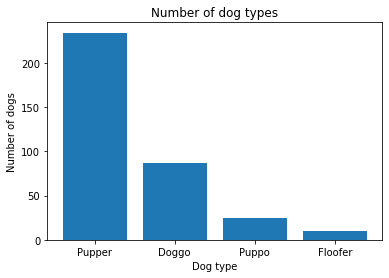

In [35]:
#Plot a bar graph to show the total number of different dog types
plt.bar(["Pupper","Doggo", "Puppo", "Floofer"], [pupper,doggo, puppo, floofer])
plt.title("Number of dog types")
plt.xlabel("Dog type")
plt.ylabel("Number of dogs")

From the chart above we can see that `Pupper` dog types were tweeted more than the others and `Floofer` type was least tweeted

<a id='image'></a>
### Image Predictions Data Wrangling

In [36]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
image_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
#check duplicates
image_data.duplicated().sum()

0

In [39]:
#Check for missing values
image_data.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

From above we find out that image prediction data has no duplicates and do not have any missing data

<a id='api_data'></a>
### Tweet API Data cleaning

In [40]:
# I will create a subset of data for only columns I need in analysis
tweet_api_data_v1=tweet_api_data[["created_at","id","source","favorite_count","retweet_count","full_text"]]
tweet_api_data_v1.columns

Index(['created_at', 'id', 'source', 'favorite_count', 'retweet_count',
       'full_text'],
      dtype='object')

In [41]:
#I will like to get the source from the last part of the URL under source column
tweet_api_data_v1["source"]=tweet_api_data_v1["source"].replace('</a>','.')

C:\Users\samso\AppData\Local\Temp\ipykernel_10532\2321208555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_api_data_v1["source"]=tweet_api_data_v1["source"].replace('</a>','.')


In [42]:
tweet_api_data_v1.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

We will like to extract the tweet source from the source URL to help us analyze the sources

In [43]:
#Extract the source from the URL
tweet_api_data_v1["source_name"]=tweet_api_data_v1["source"].str.rstrip('</a>').str.split('>').str[1]
tweet_api_data_v1.source_name.unique()

C:\Users\samso\AppData\Local\Temp\ipykernel_10532\2636851390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_api_data_v1["source_name"]=tweet_api_data_v1["source"].str.rstrip('</a>').str.split('>').str[1]


array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [44]:
#Convert the date column
tweet_api_data_v1["created_at"] = pd.to_datetime(tweet_api_data_v1["created_at"])

tweet_api_data_v1["created_at"] = tweet_api_data_v1["created_at"].dt.date
#After converting now check the column
tweet_api_data_v1.created_at[:2]

C:\Users\samso\AppData\Local\Temp\ipykernel_10532\4231537269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_api_data_v1["created_at"] = pd.to_datetime(tweet_api_data_v1["created_at"])
C:\Users\samso\AppData\Local\Temp\ipykernel_10532\4231537269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_api_data_v1["created_at"] = tweet_api_data_v1["created_at"].dt.date


0    2017-08-01
1    2017-08-01
Name: created_at, dtype: object

We can see that the column has now the correct date format but the the data type is an object. We will need to convert this column to datetype 

In [45]:
#Convert the data type back to datetime
tweet_api_data_v1["created_at"] = pd.to_datetime(tweet_api_data_v1["created_at"])
tweet_api_data_v1.created_at.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: created_at
Non-Null Count  Dtype         
--------------  -----         
2354 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


C:\Users\samso\AppData\Local\Temp\ipykernel_10532\29436789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_api_data_v1["created_at"] = pd.to_datetime(tweet_api_data_v1["created_at"])


In [46]:
#Rename the id to tweet_id to match other dataset id column headers
tweet_api_data_v1 = tweet_api_data_v1.rename(columns={"id":"tweet_id", "source":"api_source"})
tweet_api_data_v1.columns

Index(['created_at', 'tweet_id', 'api_source', 'favorite_count',
       'retweet_count', 'full_text', 'source_name'],
      dtype='object')

In [47]:
image_data.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [48]:
twitter_enhanced_v3.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'Dog_type',
       'type_available'],
      dtype='object')

In [49]:
#Save the full twet CSV data
tweet_api_data_v1.to_csv("Data//tweet_api_data_v1.csv")

<a id='data_analysis'></a>
### Data Analysis

In [50]:
#Merge the three tables to be ready for Analysis
full_tweet_table=pd.merge(image_data, twitter_enhanced_v3, how='inner', on = ['tweet_id'])
full_tweet_table=pd.merge(tweet_api_data_v1, twitter_enhanced_v3, how='inner', on = ['tweet_id'])

#Save the full_twet_table to local directory
full_tweet_table.to_csv("Data//full_tweet_table.csv")
full_tweet_table.head()

,created_at,tweet_id,api_source,favorite_count,retweet_count,full_text,source_name,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_type,type_available
0,2017-08-01,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",39467,8853,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,2017-08-01,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",39467,8853,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,floofer,None
2,2017-08-01,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",39467,8853,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,pupper,None
3,2017-08-01,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",39467,8853,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,puppo,None
4,2017-08-01,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",33819,6514,This is Tilly. She's just checking pup on you....,Twitter for iPhone,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None


Text(0.5, 1.0, 'Number of tweets over time')

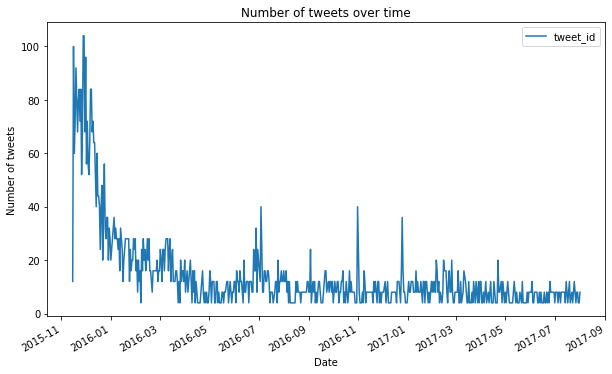

In [51]:
#Find the total number of tweets over time
graph_data=full_tweet_table.groupby('created_at')[["tweet_id"]].count()
plot=graph_data.plot.line(figsize=(10,6))
plot.set_ylabel('Number of tweets')
plot.set_xlabel('Date')
plot.set_title('Number of tweets over time')

We can see that in 2015 there was more tweets in a day and seems number of tweets per day are reducing with time. This shows that people are not rating their dogs over time 

In [52]:
#Show the number of 
full_tweet_table['source_name'].value_counts()

Twitter for iPhone     8168
Vine - Make a Scene     364
Twitter Web Client      124
TweetDeck                44
Name: source_name, dtype: int64

In [53]:
full_tweet_table.tweet_id.count()

8700

Text(0.5, 1.0, 'Number of tweets per tweet')

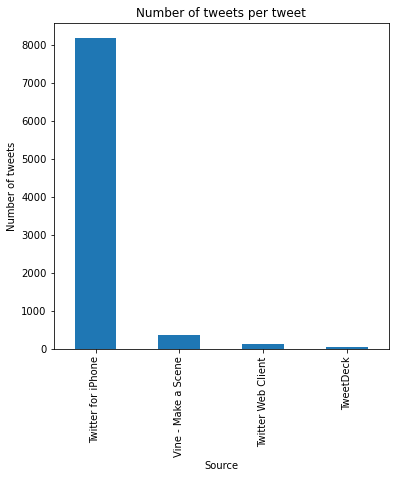

In [54]:
#Plot a graph to show number of tweets from different sources/devices
plot = full_tweet_table['source_name'].value_counts().plot(kind = 'bar', figsize = (6,6))
plot.set_ylabel('Number of tweets')
plot.set_xlabel('Source')
plot.set_title('Number of tweets per tweet')

This shows that most of users are using Iphone devices when using twitter compared to others 

In [56]:
#let get the stages of dog that is mostly retweeted
full_tweet_table.groupby(['type_available'])['retweet_count'].mean()

type_available
None       2714.972915
doggo      6189.655172
floofer    4083.600000
pupper     2522.401709
puppo      6847.040000
Name: retweet_count, dtype: float64

Text(0.5, 1.0, 'Number of retweets per dog type')

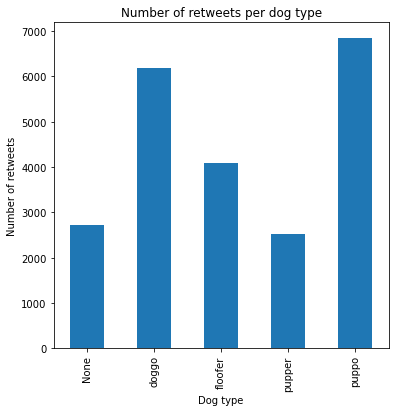

In [57]:
#Plot a graph to show number of retweets from different dog typess
plot = full_tweet_table.groupby(['type_available'])['retweet_count'].mean().plot(kind = 'bar', stacked = False, figsize = (6,6))
plot.set_ylabel('Number of retweets')
plot.set_xlabel('Dog type')
plot.set_title('Number of retweets per dog type')

This shows that `Puppo` was retweeted most followed by `doggo`. This can mean that twitter users were impressed with the dog rating or the caption text with the dog ratings

In [58]:
#let get the stages of dog that is mostly liked
full_tweet_table.groupby(['type_available'])['favorite_count'].mean()

type_available
None        8654.141059
doggo      17108.804598
floofer    11674.900000
pupper      7385.705128
puppo      21871.080000
Name: favorite_count, dtype: float64

Text(0.5, 1.0, 'Number of likes per tweet')

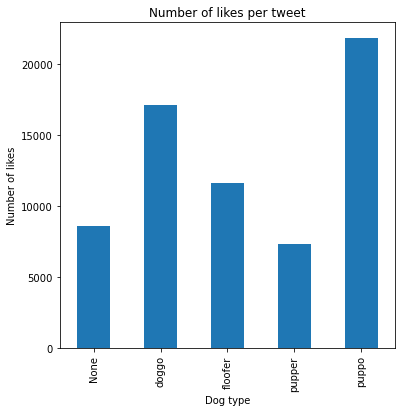

In [59]:
#Plot a graph to show number of tweet favourites or likes from different dog typess
plot = full_tweet_table.groupby(['type_available'])['favorite_count'].mean().plot(kind = 'bar', stacked = False, figsize = (6,6))
plot.set_ylabel('Number of likes')
plot.set_xlabel('Dog type')
plot.set_title('Number of likes per tweet')

Also `Puppo` dog type had most likes after the ratings which means that people liked most this type of dogs

In [60]:
# most common dog types
dog_names = full_tweet_table['name'].value_counts()[:10]
dog_names

None       2720
a           220
Lucy         44
Charlie      44
Cooper       40
Oliver       40
Tucker       36
Penny        36
Lola         32
the          32
Name: name, dtype: int64

Text(0.5, 1.0, 'Number of name occurance')

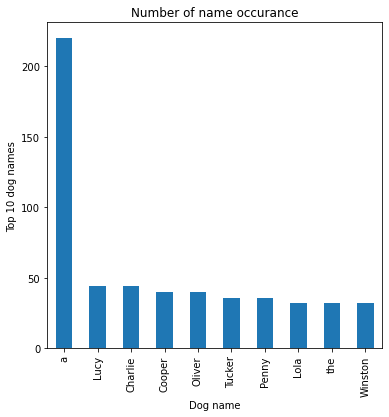

In [61]:
#Plot a graph to show top 10 dog names 
plot= full_tweet_table['name'].value_counts()[1:11].plot(kind = 'bar', figsize = (6,6))
plot.set_ylabel('Top 10 dog names')
plot.set_xlabel('Dog name')
plot.set_title('Number of name occurance')

<a id='conclusion'></a>
### Conclusion

- We have found out that most of users were tweeting using Iphone and very few were using tweeter on the desktop
- It is also evident that Pupper was the most dog type that was rated and puppo was the dog type was retweeted most and most liked
- 